# Praca domowa nr 7
*Piotr Marciniak*
## Wczytanie pakietów i zbiorów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

In [2]:
test = pd.read_csv("../../test.csv")
train = pd.read_csv("../../train.csv")
val = pd.read_csv("../../val.csv")

## Sprawdzenie zbiorów

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       95 non-null     float64
 1   Malic acid                    95 non-null     float64
 2   Ash                           95 non-null     float64
 3   Alcalinity of ash             95 non-null     float64
 4   Magnesium                     95 non-null     int64  
 5   Total phenols                 95 non-null     float64
 6   Flavanoids                    95 non-null     float64
 7   Nonflavanoid phenols          95 non-null     float64
 8   Proanthocyanins               95 non-null     float64
 9   Color intensity               95 non-null     float64
 10  Hue                           95 non-null     float64
 11  OD280/OD315 of diluted wines  95 non-null     float64
 12  Proline                       95 non-null     int64  
dtypes: floa

In [4]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       17 non-null     float64
 1   Malic acid                    17 non-null     float64
 2   Ash                           17 non-null     float64
 3   Alcalinity of ash             17 non-null     float64
 4   Magnesium                     17 non-null     int64  
 5   Total phenols                 17 non-null     float64
 6   Flavanoids                    17 non-null     float64
 7   Nonflavanoid phenols          17 non-null     float64
 8   Proanthocyanins               17 non-null     float64
 9   Color intensity               17 non-null     float64
 10  Hue                           17 non-null     float64
 11  OD280/OD315 of diluted wines  17 non-null     float64
 12  Proline                       17 non-null     int64  
dtypes: floa

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         17 non-null     int64  
 1   Alcohol                       17 non-null     float64
 2   Malic acid                    17 non-null     float64
 3   Ash                           17 non-null     float64
 4   Alcalinity of ash             17 non-null     float64
 5   Magnesium                     17 non-null     int64  
 6   Total phenols                 17 non-null     float64
 7   Flavanoids                    17 non-null     float64
 8   Nonflavanoid phenols          17 non-null     float64
 9   Proanthocyanins               17 non-null     float64
 10  Color intensity               17 non-null     float64
 11  Hue                           17 non-null     float64
 12  OD280/OD315 of diluted wines  17 non-null     float64
 13  Proline

Zbiory są dobrze przygotowane. Nie mają braków danych.

In [6]:
train.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,12.604211,2.436000,2.315895,20.662105,96.726316,2.018526,1.539579,0.400000,1.429263,4.941789,0.912589,2.307263,572.242105
std,0.682538,1.191029,0.298223,3.227778,13.737232,0.538838,0.822284,0.130245,0.550238,2.749656,0.260982,0.695243,148.401534
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.470000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.165000,1.430000,2.195000,18.500000,87.500000,1.620000,0.815000,0.290000,1.040000,2.875000,0.675000,1.675000,465.500000
50%,12.520000,2.130000,2.320000,20.000000,94.000000,1.950000,1.460000,0.400000,1.350000,3.850000,0.906000,2.260000,560.000000
75%,13.095000,3.280000,2.500000,22.500000,103.000000,2.310000,2.075000,0.500000,1.680000,6.550000,1.110000,2.915000,676.500000
max,14.340000,5.650000,3.230000,30.000000,151.000000,3.500000,5.080000,0.630000,3.580000,13.000000,1.710000,3.690000,985.000000


In [7]:
test.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.294118,12.905294,2.201176,2.338235,18.529412,101.352941,2.307059,1.984706,0.352353,1.684706,4.518235,0.958235,2.715882,732.941176
std,0.469668,0.917933,1.223887,0.234287,3.336683,21.002801,0.619049,1.073191,0.141268,0.800540,1.914416,0.203108,0.612689,328.074967
min,0.000000,11.810000,0.890000,1.880000,11.200000,80.000000,1.280000,0.470000,0.140000,0.420000,2.060000,0.540000,1.750000,278.000000
25%,0.000000,12.000000,1.520000,2.200000,17.000000,86.000000,1.650000,0.990000,0.220000,1.150000,2.800000,0.790000,2.260000,520.000000
50%,0.000000,12.870000,1.730000,2.360000,19.000000,96.000000,2.500000,2.210000,0.320000,1.560000,4.380000,0.950000,2.730000,625.000000
75%,1.000000,13.580000,2.810000,2.480000,21.000000,106.000000,2.860000,3.000000,0.470000,2.030000,6.380000,1.050000,3.170000,970.000000
max,1.000000,14.750000,4.610000,2.740000,22.500000,162.000000,3.200000,3.690000,0.600000,3.280000,7.650000,1.380000,3.640000,1515.000000


Większośc danych testowych nie jest outlierem.

In [8]:
val.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,13.258235,2.659412,2.385294,20.682353,93.470588,2.302941,2.132353,0.358235,1.524706,4.899412,0.911765,2.675882,649.235294
std,0.744767,1.400185,0.213662,2.634918,9.240655,0.747761,1.156901,0.116148,0.469882,2.363479,0.220659,0.739443,280.013287
min,12.040000,1.070000,2.100000,14.000000,80.000000,0.980000,0.340000,0.190000,0.550000,2.060000,0.580000,1.330000,315.000000
25%,12.430000,1.610000,2.230000,19.500000,86.000000,1.680000,0.750000,0.280000,1.350000,3.380000,0.720000,2.060000,410.000000
50%,13.480000,1.900000,2.300000,21.500000,90.000000,2.530000,2.610000,0.370000,1.660000,4.500000,0.890000,2.850000,615.000000
75%,13.780000,3.370000,2.500000,22.000000,100.000000,2.800000,2.980000,0.410000,1.870000,5.200000,1.060000,3.160000,845.000000
max,14.830000,5.800000,2.800000,25.000000,108.000000,3.520000,3.750000,0.660000,2.040000,10.260000,1.360000,3.820000,1285.000000


In [9]:
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

X_test.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [10]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Wybór odpowiedniego thresholda
Chcemy przyporządkować wielowymiarowy rozkład normalny do naszych danych (dlatego używamy 1 klastra), aby potem sprawdzić jakie jest prawdopodobieństwo że dany element należy do klastra.

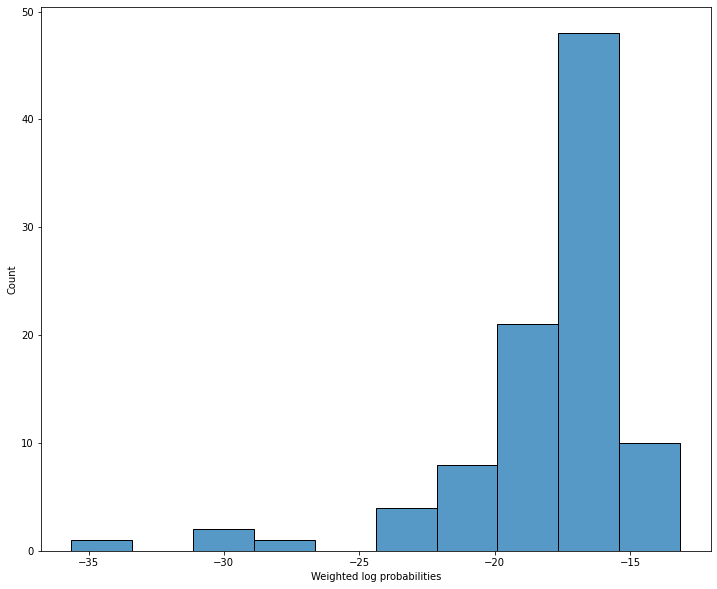

In [11]:
gm = GaussianMixture(n_components=1, covariance_type='full', random_state=2137, n_init=50)
gm.fit(train)

def plot_log_prob(x):
    plt.figure(figsize=(12,10))
    sns.histplot(x, bins=10)
    plt.xlabel("Weighted log probabilities")
    plt.show()
    
log_prob_train = gm.score_samples(train)
plot_log_prob(log_prob_train)

Mając minimum ważonego logarytmicznego prawdopodobieństwa dla zbioru trenującego mogliśmy stworzyć model, który miałby najlepszy recall. Ale naszym celem jest stworzenie jak najbardziej dopasowanego modelu do zbioru walidacyjnego.

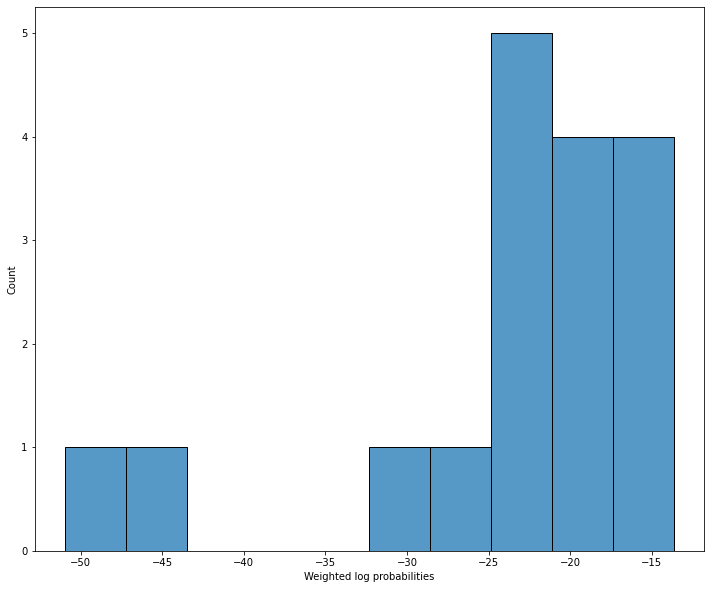

In [12]:
log_prob_val = gm.score_samples(val)
plot_log_prob(log_prob_val)

Jak widzimy w zbiorze walidacyjnym rzucają się nam 2 obserwacje, które mają znacznie mniejszy logarytm prawdopodobieństwa niż reszta, dlatego jako threshold wybierzemy wartość, która będzie w okolicach 3 - 4 obserwacji.

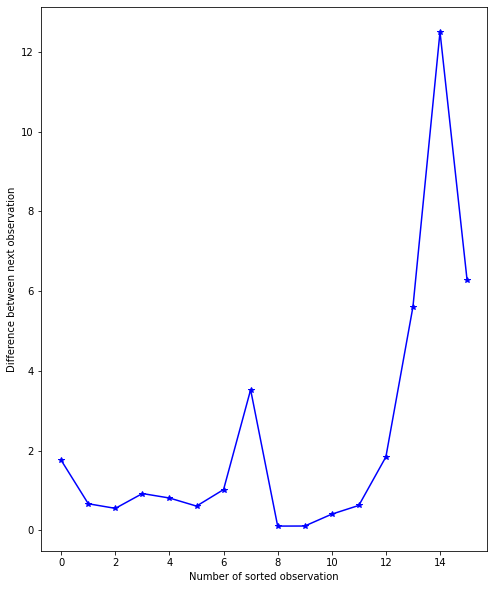

In [13]:
sort_log = np.sort(log_prob_val)[::-1]
plt.figure(figsize=(8, 10))
plt.plot(sort_log[0:-1]-sort_log[1:], 'b-*')
plt.xlabel("Number of sorted observation")
plt.ylabel("Difference between next observation")
plt.show()

Po spojrzeniu na dane widzimy, że pomiędzy 3 - 4 obserwacją od końca mamy większy wzrost różnicy. Dlatego threshold wybiorę na poziomie 4 obserwacji od końca plus połowa różnicy pomiędzy 3-4 obserwacją. Defacto różnica pomiędzy 4 a 5 od końca obserwacją nie jest jakaś duża.

In [14]:
threshold = sort_log[-4] + (sort_log[-3] - sort_log[-4])/2
threshold

-29.375321363404485

## Testowanie

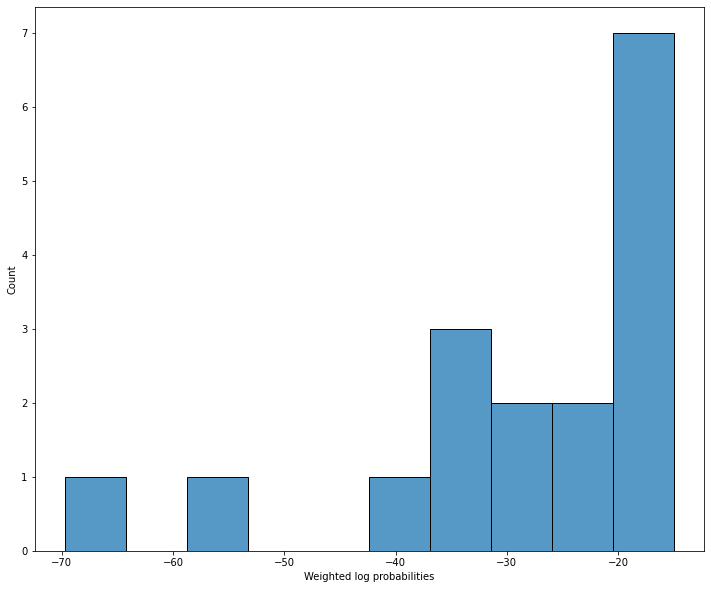

In [15]:
log_prob_test = gm.score_samples(X_test)
plot_log_prob(log_prob_test)

Explained variance: 0.9998801539880069


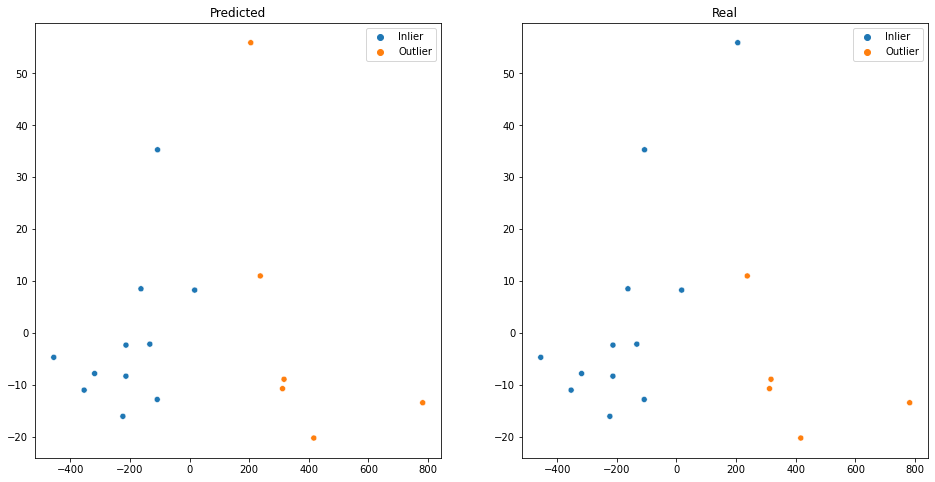

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_test)
print(f"Explained variance: {sum(pca.explained_variance_ratio_)}")

def plot_set(x, label):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], 
                    hue=map(lambda x: "Inlier" if x == 0 else "Outlier", label), 
                    legend=True)

y_pred = np.array(gm.score_samples(X_test) < threshold, dtype = int)    

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.title("Predicted")
plot_set(x_pca, y_pred)
plt.subplot(122)
plt.title("Real")
plot_set(x_pca, y_test.values)

Jak widzimy nasz model oznaczył jedną próbkę nadmiarowo jako outlier, co po spojrzeniu na wizualizację nie wydaję sie jakoś bardzo odrealnione. 

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score

pd.DataFrame.from_records(
    [
        ("Precision", precision_score(y_true=y_test, y_pred=y_pred)),
        ("Recall", recall_score(y_true=y_test, y_pred=y_pred)),
        ("F1-Score", f1_score(y_true=y_test, y_pred=y_pred))
    ],
    columns=["Metric", "Score"]
)

,Metric,Score
0,Precision,0.833333
1,Recall,1.000000
2,F1-Score,0.909091


## Podsumowanie
Widzimy, że możemy użyć Gausian Mixture do wykrywania outlierów, o ile mamy podejrzenie, że próbka jest z wielowymiarowego rozkładu normalnego, albo czegoś co przypomina wielowymiarowy rozkład normalny.